In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

# The following commented lines are for reading various CSV files into pandas DataFrames.
# Uncomment them if you have these CSV files and you want to use them in your analysis.

# Read the CSV file containing data about artificial stars generated in rgb and ms cmd of M33
# b1= pd.read_csv('b1_comb.csv', sep=',')

# Read the CSV file containing data about artificial stars generated in rgb and ms cmd of M33, including position transformations
# i1= pd.read_csv('i1_comb.csv', sep=',')

# Read the CSV file containing photometry output of all stars and artificial stars
# biart= pd.read_csv('biart_comb.csv', delimiter=',')

# Read the CSV file containing photometry output of original image with all identified stars
biall= pd.read_csv('biall_original.csv', delimiter=',')

In [2]:
biall.shape

(386936, 9)

In [3]:
biall.head()

,Id,x,y,B,B_e,I,I_e,std_sky,skewness_sky
0,1,-0.214,908.046,16.774,0.1064,18.253,0.0937,1.7295,0.0520
1,2,-0.157,721.290,15.747,0.0701,14.425,0.0142,2.7465,0.1325
2,3,-0.126,1840.115,16.970,0.0963,16.911,0.0353,1.7465,0.1435
3,4,-0.050,2017.035,16.534,0.0642,15.503,0.0170,1.8485,0.1665
4,5,-0.025,1944.133,17.027,0.1058,16.868,0.0271,1.5750,0.2930


In [4]:
biall.columns

Index(['Id', 'x', 'y', 'B', 'B_e', 'I', 'I_e', 'std_sky', 'skewness_sky'], dtype='object')

In [5]:
biall

,Id,x,y,B,B_e,I,I_e,std_sky,skewness_sky
0,1,-0.214,908.046,16.774,0.1064,18.253,0.0937,1.7295,0.0520
1,2,-0.157,721.290,15.747,0.0701,14.425,0.0142,2.7465,0.1325
2,3,-0.126,1840.115,16.970,0.0963,16.911,0.0353,1.7465,0.1435
3,4,-0.050,2017.035,16.534,0.0642,15.503,0.0170,1.8485,0.1665
4,5,-0.025,1944.133,17.027,0.1058,16.868,0.0271,1.5750,0.2930
...,...,...,...,...,...,...,...,...,...
386931,386932,4064.481,519.684,16.849,0.0412,15.755,0.0341,2.3300,0.0410
386932,386933,4064.533,225.930,16.369,0.0278,15.522,0.0548,2.6845,0.0220
386933,386934,4064.666,291.816,18.089,0.1100,17.412,0.0921,2.0325,-0.0060
386934,386935,4064.696,155.318,17.674,0.0675,17.023,0.0734,1.9655,-0.1675


----
----
## M33
* ### coordinate center = ['Nucleus of M33']
* ### coordinate (x_c, y_c) = ( [' 2940 '] , [' 1150 '] )
* ### xlim: (-0.214, 4064.7129999999997)
* ### ylim: (20.915, 2050.326)*

M33 is an Sc,late-type spiral galaxy 

Its center is located at (hrs, mins, secs): 

(RA: 01: 33:5 0.890, DEC: +30: 39: 36.79 )
(24.462040°, 30.660220°)


nsc review found nsc within 50pc, but evidence from nsc paper (Nadine) shows nsc to be found within 20 pc of the nuclei of early-type galaxy.

20pc = 0.005 arcseconds 
	
Then we should expect nsc to be found within a radius 0.05 arcsecond from the center of the galaxy in the interval:

RA: (01:33:50.895, 01:33:50.885)
DEC: (+30:39:36.785, +30:39:36.795) 

HST ACS camera conversion pixel -> 1 pixel = 0.05 arcseconds = 0.05’’

1 arcminute=1'=1/60°=60''=π/10800


----
----

In [6]:
#distances
min(np.sqrt(
        (biall['x']-2940)**2
        +(biall['y']-1150)**2))

3.9809231341487665

In [7]:
max(np.sqrt(
        (biall['x']-2940)**2
        +(biall['y']-1150)**2))

3146.466947808764

In [8]:
biall['radial_d'] = np.sqrt((biall['x']-2940)**2+(biall['y']-1150)**2)
#radial_d

In [9]:
#convert pixels to arcseconds: 1 pixel = 0.05 arcseconds
biall['radial_d_arcsecs']=biall['radial_d']*0.05

In [10]:
m33 = biall[['Id', 'x', 'y','radial_d','radial_d_arcsecs', 'B', 'B_e', 'I', 'I_e', 'std_sky', 'skewness_sky']]

In [11]:
m33

,Id,x,y,radial_d,radial_d_arcsecs,B,B_e,I,I_e,std_sky,skewness_sky
0,1,-0.214,908.046,2950.152556,147.507628,16.774,0.1064,18.253,0.0937,1.7295,0.0520
1,2,-0.157,721.290,2971.248130,148.562406,15.747,0.0701,14.425,0.0142,2.7465,0.1325
2,3,-0.126,1840.115,3020.033048,151.001652,16.970,0.0963,16.911,0.0353,1.7465,0.1435
3,4,-0.050,2017.035,3065.231426,153.261571,16.534,0.0642,15.503,0.0170,1.8485,0.1665
4,5,-0.025,1944.133,3045.389010,152.269451,17.027,0.1058,16.868,0.0271,1.5750,0.2930
...,...,...,...,...,...,...,...,...,...,...,...
386931,386932,4064.481,519.684,1289.091067,64.454553,16.849,0.0412,15.755,0.0341,2.3300,0.0410
386932,386933,4064.533,225.930,1455.499857,72.774993,16.369,0.0278,15.522,0.0548,2.6845,0.0220
386933,386934,4064.666,291.816,1414.691977,70.734599,18.089,0.1100,17.412,0.0921,2.0325,-0.0060
386934,386935,4064.696,155.318,1501.443763,75.072188,17.674,0.0675,17.023,0.0734,1.9655,-0.1675


In [12]:
# Python program to count the  
# number of numbers in a given range 
  
def count(list1, l, r): 
      
    # x for x in list1 is same as traversal in the list 
    # the if condition checks for the number of numbers in the range  
    # l to r  
    # the return is stored in a list 
    # whose length is the answer 
    return len(list(x for x in list1 if l <= x <= r)) 
  
# driver code 
list1 = [10, 20, 30, 40, 50, 40, 40, 60, 70] 
l = 40
r = 80 
print(count(list1, l, r) )

6


In [13]:
#number of stars within a radial distance 
#(m33['radial_d']<10).value_counts()
(m33['radial_d']<10).sum()


13

In [14]:
count(m33['radial_d'], 3000, 5000)

1596

In [15]:
#bin size
#m33['radial_d'][(m33['radial_d']<=1000)]      

In [16]:
m33['radial_d'][(m33['radial_d']<=500)]  

218430    499.403307
218490    498.572709
218506    499.053246
218509    498.393422
218537    498.331674
             ...    
325939    499.809120
325944    498.122217
326023    499.264535
326102    499.936582
326117    499.997248
Name: radial_d, Length: 43676, dtype: float64

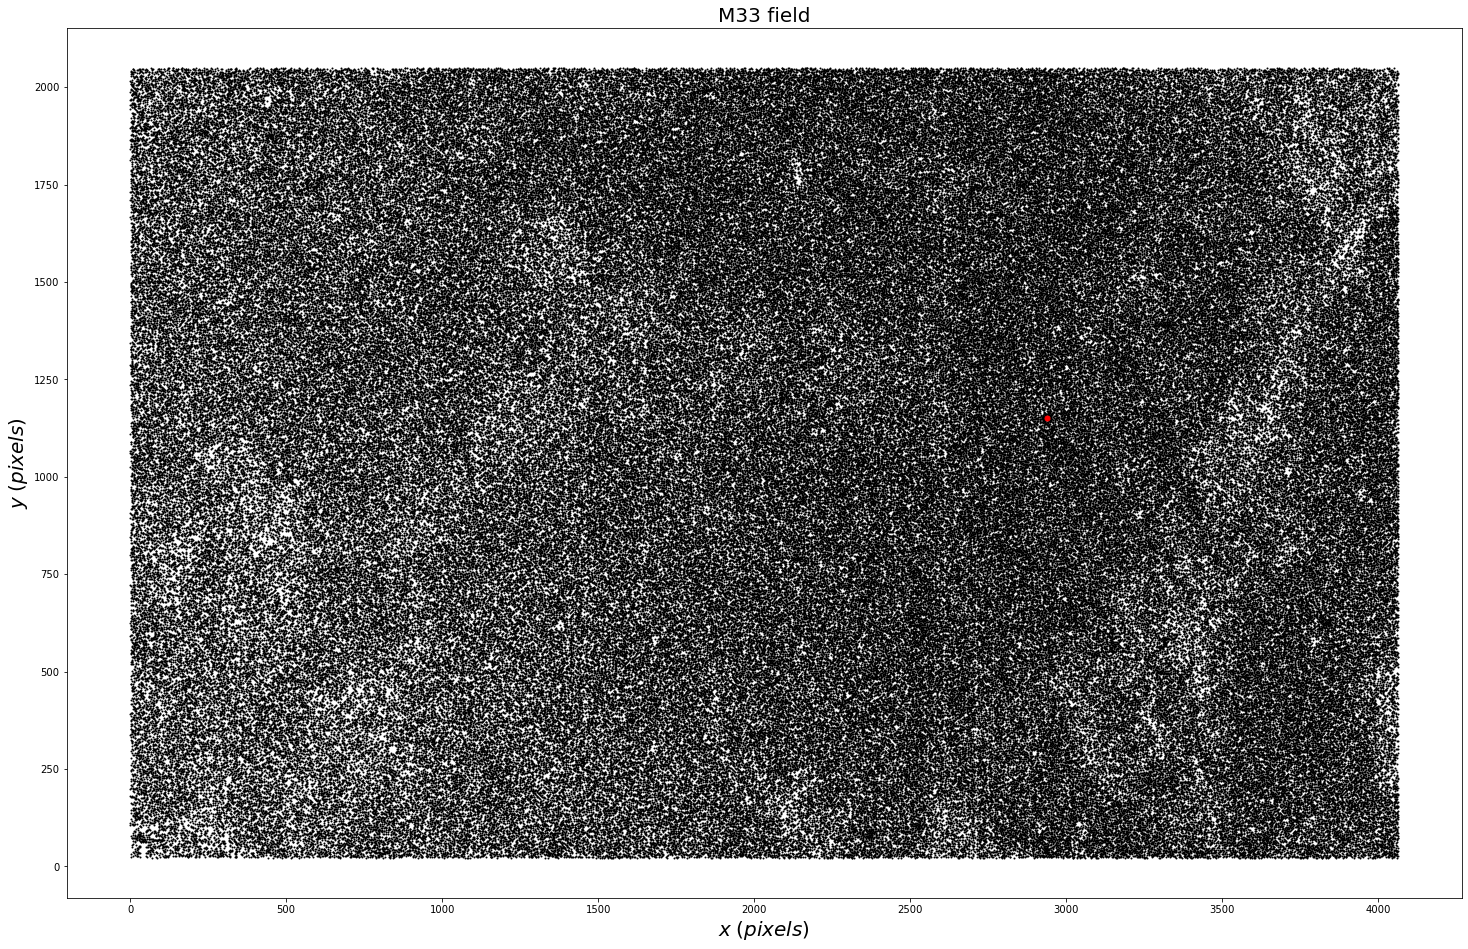

In [17]:
# Create a figure
plt.figure(figsize=(25,16))

# Scatter plot of star positions
plt.scatter(m33['x'], m33['y'], color='black', s=1, marker='o')

# Mark a point of interest
plt.plot(2940,1150, marker='o', markersize=5, c='red')

# Add a label (currently empty)
plt.text(2950,1160,'',fontsize=20)

# Set title and axis labels
plt.title('M33 field', fontsize=20)
plt.xlabel("$x\;(pixels)$", fontsize=20)
plt.ylabel("$y\;(pixels)$", fontsize=20)

# Display the plot
plt.show()

# Save the plot (uncomment to use)
#plt.savefig('name.png', dpi=300, facecolor = 'w', bbox_inches='tight')

In [61]:
1150+500

1650

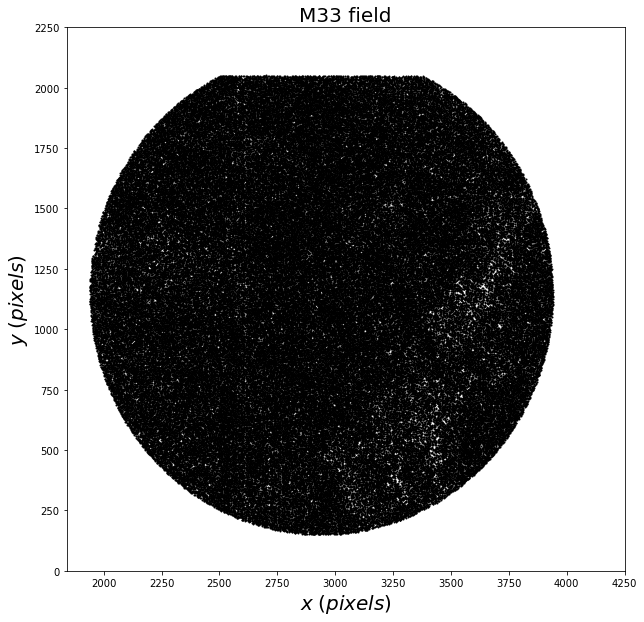

In [102]:
# This code creates a scatter plot of the positions of stars in the M33 galaxy that are within 
# a radial distance d
# Create a new figure with a specified size
plt.figure(figsize=(10,10))

# Create a scatter plot of the 'x' and 'y' columns of the m33 DataFrame for stars within a radial distance of 1000
plt.scatter(m33['x'][(m33['radial_d']<=1000)], m33['y'][(m33['radial_d']<=1000)], color='black', s=1, marker='o')

# Set the x and y axis tick marks
plt.xticks(np.arange(2000,4500,250), fontsize = 10)
plt.yticks(np.arange(0,2300,250), fontsize = 10)

# Add a text label at the point (2950, 1160). The text is currently an empty string.
plt.text(2950,1160,'',fontsize=20)

# Set the title of the plot and the labels of the x and y axes
plt.title('M33 field', fontsize=20)
plt.xlabel("$x\;(pixels)$", fontsize=20)
plt.ylabel("$y\;(pixels)$", fontsize=20)

# Display the plot
plt.show()

# Save the plot as a PNG file. This line is currently commented out.
#plt.savefig('name.png', dpi=300, facecolor = 'w', bbox_inches='tight')


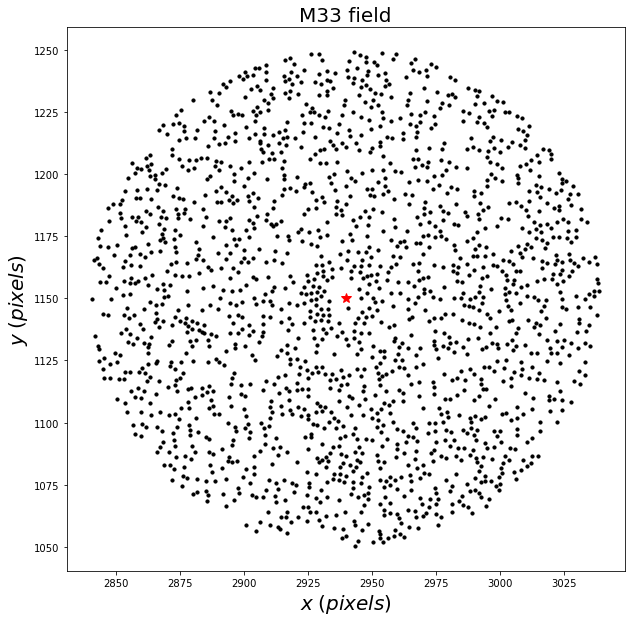

In [103]:
# Create a new figure with a specified size
plt.figure(figsize=(10,10))

# Plot a red star at the point (2940, 1150)
plt.plot(2940,1150, marker='*', markersize=10, c='red')

# Create a scatter plot of the 'x' and 'y' columns of the m33 DataFrame for stars within a radial distance of 100
plt.scatter(m33['x'][(m33['radial_d']<=100)], m33['y'][(m33['radial_d']<=100)], color='black', s=10, marker='o')

# Add a text label at the point (2950, 1160). The text is currently an empty string.
plt.text(2950,1160,'',fontsize=20)

# Set the title of the plot and the labels of the x and y axes
plt.title('M33 field', fontsize=20)
plt.xlabel("$x\;(pixels)$", fontsize=20)
plt.ylabel("$y\;(pixels)$", fontsize=20)

# Display the plot
plt.show()

# Save the plot as a PNG file. This line is currently commented out.
#plt.savefig('name.png', dpi=300, facecolor = 'w', bbox_inches='tight')

# Extract all stars with a radial distance

In [95]:
start = time.time()

# Calculate radial distances for all stars
biall['radial_d'] = np.sqrt( (biall['x']-2940)**2 + (biall['y']-1150)**2 )

# Create a list of dictionaries
data = []
for i in range(len(biall.index)):
    star = biall.iloc[i]
    data.append({
        'Id': star['Id'],
        'x': star['x'],
        'y': star['y'],
        'B': star['B'],
        'B_e': star['B_e'],
        'I': star['I'],
        'I_e': star['I_e'],
        'std_sky': star['std_sky'],
        'skewness_sky': star['skewness_sky'],
        'radial_d': star['radial_d']
    })

# Convert the list to a DataFrame
m33 = pd.DataFrame(data)

print('extracting done! Duration: {} seconds'.format(time.time()-start))

extracting done! Duration: 584.8446691036224 seconds


In [96]:
m33

,Id,x,y,B,B_e,I,I_e,std_sky,skewness_sky,radial_d
0,1.0,-0.214,908.046,16.774,0.1064,18.253,0.0937,1.7295,0.0520,2950.152556
1,2.0,-0.157,721.290,15.747,0.0701,14.425,0.0142,2.7465,0.1325,2971.248130
2,3.0,-0.126,1840.115,16.970,0.0963,16.911,0.0353,1.7465,0.1435,3020.033048
3,4.0,-0.050,2017.035,16.534,0.0642,15.503,0.0170,1.8485,0.1665,3065.231426
4,5.0,-0.025,1944.133,17.027,0.1058,16.868,0.0271,1.5750,0.2930,3045.389010
...,...,...,...,...,...,...,...,...,...,...
386931,386932.0,4064.481,519.684,16.849,0.0412,15.755,0.0341,2.3300,0.0410,1289.091067
386932,386933.0,4064.533,225.930,16.369,0.0278,15.522,0.0548,2.6845,0.0220,1455.499857
386933,386934.0,4064.666,291.816,18.089,0.1100,17.412,0.0921,2.0325,-0.0060,1414.691977
386934,386935.0,4064.696,155.318,17.674,0.0675,17.023,0.0734,1.9655,-0.1675,1501.443763


In [24]:
# To extract stars within a certain radial distance, you can simply use a boolean mask to filter the DataFrame

# Define the maximum radial distance
max_radial_d = 4000  # replace this with your desired value

# Filter the DataFrame
stars_within_distance = m33[m33['radial_d'] <= max_radial_d]


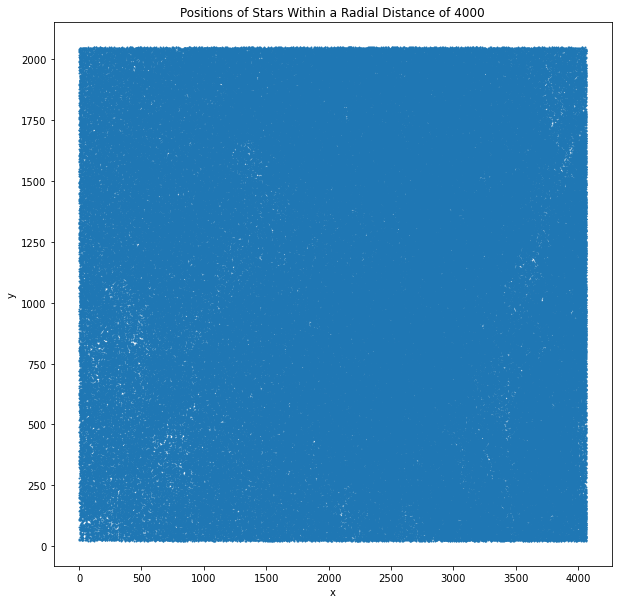

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(stars_within_distance['x'], stars_within_distance['y'], s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Positions of Stars Within a Radial Distance of {}'.format(max_radial_d))
plt.show()


In [31]:
#bin size 
(3000-0)/60

50.0

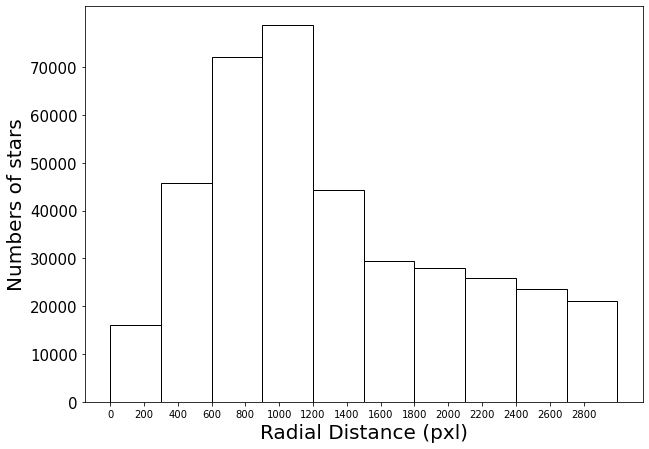

In [105]:
# binned radial distance in pixels from center of galaxy histogram for distance

# figure size
plt.figure(figsize=(10,16))

# subplot
plt.figure(1)
plt.subplot(211)

b=15

# plotting histogram 

n1, bins1, patches1 = plt.hist(m33['radial_d'],
                            #bins=b,
                            #color='blue', 
                            range=(0,3000),
                            histtype='bar', 
                            rwidth=1, 
                            ec='black', 
                            edgecolor = 'black',
                            facecolor='white',
                            #alpha = .7,
                            lw=1); # align ='mid'


plt.xticks(np.arange(0,3000,200), fontsize = 10)
plt.yticks(np.arange(0,80000,10000), fontsize = 15)
        
# histogram labels
plt.title('', 
          fontsize=20, 
          color='black', 
          loc='center')
plt.xlabel('Radial Distance (pxl)',fontsize=20)
plt.ylabel('Numbers of stars',fontsize=20)


plt.show()

#plt.savefig('extract_p5_0.5bs_binned_bmag_hist.png', dpi=300, facecolor = 'w', bbox_inches='tight')

In [18]:
print('number stars =',n1)
print()
print('bin edge = ',bins1)
print()

number stars = [12546. 38656. 62476. 73140. 63067. 55099. 30835. 22340. 21235.  7542.]

bin edge =  [1.38452158e-01 2.73225624e+02 5.46312796e+02 8.19399968e+02
 1.09248714e+03 1.36557431e+03 1.63866148e+03 1.91174866e+03
 2.18483583e+03 2.45792300e+03 2.73101017e+03]



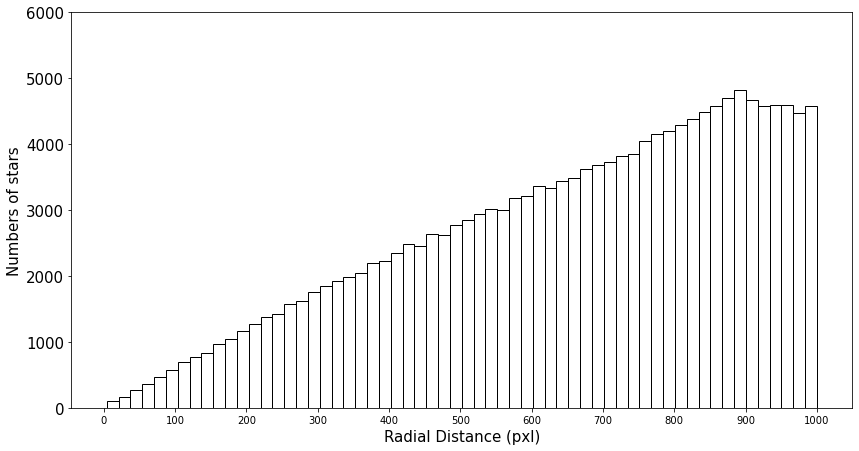

In [32]:
# binned radial distance of 1000 pixels from center of galaxy histogram for distance

# figure size
plt.figure(figsize=(14,16))

# subplot
plt.figure(1)
plt.subplot(211)

b=60

# plotting histogram 

n2, bins2, patches2 = plt.hist(m33['radial_d'][(m33['radial_d']<1000)],
                            bins=b,
                            #color='blue', 
                            histtype='bar', 
                            rwidth=1, 
                            ec='black', 
                            edgecolor = 'black',
                            facecolor='white',
                            #alpha = .7,
                            lw=1); # align ='mid'

plt.xticks(np.arange(0,1100,100), fontsize = 10)
plt.yticks(np.arange(0,7000,1000), fontsize = 15)

# histogram labels
plt.title('', 
          fontsize=20, 
          color='black', 
          loc='center')
plt.xlabel('Radial Distance (pxl)',fontsize=15)
plt.ylabel('Numbers of stars',fontsize=15)

plt.show()

#plt.savefig('extract_p5_0.5bs_binned_bmag_hist.png', dpi=300, facecolor = 'w', bbox_inches='tight')